# Plotting 3.0

Last session, 004_Plotting, we graphed real data in scatter plot earning how to use multiple axes, error bands, and saving our figures. This session we will use the exact same data (and process to read it in) but plot it using the following:
1) Subplots
2) Bar charts

__Additional Concepts__:
- Defining some "global" plotting parameters (fonts, sizes)
- Hatches
- Colormaps

*Last edited: Isabella Casini 08.07.2025*

# __1) Data importing from previous lesson__

## 1) Import required packages

In [2]:
# import relevant packages (entire line is commented out)

import pandas as pd # call pandas "pd" for short (midline comment)

import matplotlib.pyplot as plt # import pyplot from matplotlib and call it "plt"
import matplotlib as mpl

import numpy as np

## 2) Download data to graph

Go to the following link and save the Data_S3.xlsx file (*remember the location you save it*).

https://github.com/isacasini/Casini_2023_GEM/tree/main

Take a few minutes to look at the "ReadMe" sheet (in Excel).

## 3) Read in data of interest as a Pandas dataframe

We will use "Sheet14" (biomass - gCDW), "Sheet17" (hydrogen specific uptake),"Sheet19" (carbon dioxide specific uptake), "Sheet21" (methane specific production).

The sheets are not very clean, so we need to alter parameters how to read in our data in a useful fashion.

In [3]:
# Path to the file (change your path to where you save your file)
pathin = r"C:\Users\uqicasin\Documents\Teaching\Program_Workshop\Sample_Data\Data_S3.xlsx"


### 3.1) Read in biomass data

In [4]:
# Read in the biomass data, ("skiprows" ->drop the first two rows; set the next two rows as combined header - MULTIINDEXING)
gcdw_df = pd.read_excel(pathin, sheet_name='Sheet14', skiprows=[0,1], header=[0,1])

In [5]:
# Take a look at the dataframe
gcdw_df

,Unnamed: 0_level_0,Reactor,2,4,5,7,1,2,3,4,5,6,7,8,ΔHAVG,ΔHSTD,ZZAVG,ZZSTD,MMAVG,MMSTD
,Unnamed: 0_level_1,Elasped Days,gCDW,gCDW,gCDW,gCDW,gCDW,gCDW.1,gCDW,gCDW.1,gCDW.1,gCDW,gCDW.1,gCDW,gCDW,gCDW,gCDW,gCDW,gCDW,gCDW
0,NaN,0,0.015568,0.007995,0.007865,0.010978,0.008877,0.006296,0.009299,0.009171,0.006239,0.008473,0.012488,0.006868,0.0078,0.000584,0.008815,0.001928,0.011558,0.002703
1,NaN,1,0.046876,0.039166,0.04915,0.036549,0.065476,0.027696,0.055824,0.028052,0.004778,0.069443,0.057611,0.03692,0.04867,0.012846,0.030765,0.004092,0.056447,0.006612
2,NaN,1.7,0.039667,0.0286,0.038834,0.0264,0.062402,0.025435,0.051033,0.023532,0.003906,0.055252,0.046457,0.048318,0.042751,0.010036,0.025122,0.001191,0.04989,0.008279
3,NaN,2.6,0.041486,0.016037,0.035589,0.027909,0.055395,0.03281,0.046028,0.021867,0.00343,0.049529,0.037234,0.057803,0.039739,0.015821,0.027529,0.004476,0.045036,0.006741
4,NaN,3.6,0.035759,0.01795,0.021944,0.028329,0.054608,0.035427,0.046028,0.027101,0.013937,0.045923,0.032229,0.05356,0.034844,0.015206,0.030286,0.00367,0.042156,0.008797
5,SS,4.1,0.035288,0.021611,0.023608,0.028329,0.047673,0.033762,0.042811,0.026387,0.016237,0.040043,0.030513,0.033758,0.029755,0.007516,0.029493,0.003121,0.039071,0.006624
6,SS,4.8,0.035827,0.024357,0.025355,0.031181,0.047673,0.032572,0.047315,0.026625,0.012351,0.033614,0.031228,0.025938,0.027316,0.00368,0.030126,0.00254,0.040511,0.007171
7,SS,5.6,0.034344,0.027518,0.033509,0.030593,0.046958,0.031304,0.04896,0.026942,0.010051,0.035809,0.032872,0.023941,0.030194,0.004711,0.029613,0.001911,0.040783,0.007229
8,SS,6.8,0.034479,0.032427,0.037336,0.030761,0.046958,0.031304,0.045385,0.024801,0.010368,0.031419,0.032658,0.02028,0.030366,0.006238,0.028955,0.002946,0.03987,0.006359


In [6]:
# Look at the column names
print(gcdw_df.columns)

MultiIndex([('Unnamed: 0_level_0', 'Unnamed: 0_level_1'),
            (           'Reactor',       'Elasped Days'),
            (                   2,               'gCDW'),
            (                   4,               'gCDW'),
            (                   5,               'gCDW'),
            (                   7,               'gCDW'),
            (                   1,               'gCDW'),
            (                   2,             'gCDW.1'),
            (                   3,               'gCDW'),
            (                   4,             'gCDW.1'),
            (                   5,             'gCDW.1'),
            (                   6,               'gCDW'),
            (                   7,             'gCDW.1'),
            (                   8,               'gCDW'),
            (             'ΔHAVG',               'gCDW'),
            (             'ΔHSTD',               'gCDW'),
            (             'ZZAVG',               'gCDW'),
            ( 

### 3.2) Extract out biomass data that we want to graph

In [7]:
# Note the structure of the column names: ('level1', 'level2')
columns_to_copy = [('Reactor','Elasped Days'),('ΔHAVG','gCDW'),('ΔHSTD','gCDW'),('ZZAVG','gCDW'),('ZZSTD','gCDW'),('MMAVG','gCDW'),('MMSTD','gCDW')]
gcdw_graph_df = gcdw_df[columns_to_copy].iloc[:9].copy() # select the rows with .iloc

In [8]:
# Check your dataframe
gcdw_graph_df

,Reactor,ΔHAVG,ΔHSTD,ZZAVG,ZZSTD,MMAVG,MMSTD
,Elasped Days,gCDW,gCDW,gCDW,gCDW,gCDW,gCDW
0,0,0.0078,0.000584,0.008815,0.001928,0.011558,0.002703
1,1,0.04867,0.012846,0.030765,0.004092,0.056447,0.006612
2,1.7,0.042751,0.010036,0.025122,0.001191,0.04989,0.008279
3,2.6,0.039739,0.015821,0.027529,0.004476,0.045036,0.006741
4,3.6,0.034844,0.015206,0.030286,0.00367,0.042156,0.008797
5,4.1,0.029755,0.007516,0.029493,0.003121,0.039071,0.006624
6,4.8,0.027316,0.00368,0.030126,0.00254,0.040511,0.007171
7,5.6,0.030194,0.004711,0.029613,0.001911,0.040783,0.007229
8,6.8,0.030366,0.006238,0.028955,0.002946,0.03987,0.006359


### 3.3) Read in H2 Data

In [9]:
# Read in the H2 data, ("skiprows" ->drop the first two rows, and the third one; no combined header)
h2_df = pd.read_excel(pathin, sheet_name='Sheet17', skiprows=[0,1,3], header=[0])

In [10]:
# Check your dataframe
h2_df

,Unnamed: 0,Elasped Days,Uptake H2_mmol/h/gCDW,Uptake H2_mmol/h/gCDW.1,Uptake H2_mmol/h/gCDW.2,Uptake H2_mmol/h/gCDW.3,Average H2,STDP H2,SS Average,SS STD,...,Unnamed: 22,Elasped Days.2,Uptake H2_mmol/h/gCDW.8,Uptake H2_mmol/h/gCDW.9,Uptake H2_mmol/h/gCDW.10,Uptake H2_mmol/h/gCDW.11,Average H2.2,STDP H2.2,SS Average.2,SS STD.2
0,NaN,0,239.476196,426.738308,10.024809,11.549805,171.947280,174.230350,208.492806,55.012368,...,NaN,0,4.841129,400.193067,11.979792,157.347749,143.590434,160.161564,136.118079,12.00762
1,NaN,1,69.775746,54.774674,0,0.000000,31.137605,7.500536,NaN,NaN,...,NaN,1,57.894818,42.069597,0.000000,0.000000,24.991104,7.912611,NaN,NaN
2,NaN,1.7,0.630981,0.457787,0,0.000000,0.272192,0.086597,NaN,NaN,...,NaN,1.7,0.451779,0.291487,0.000000,0.356421,0.274922,0.065831,NaN,NaN
3,NaN,2.6,-811.739315,-471.498523,0,0.000000,-320.809460,170.120396,NaN,NaN,...,NaN,2.6,-357.492827,-243.034046,0.000000,-318.239869,-229.691685,47.489792,NaN,NaN
4,NaN,3.6,1078.674344,861.634816,152.222268,89.482084,545.503378,432.098315,Average without gross error,STD without gross error,...,NaN,3.6,134.675745,120.571714,152.111691,126.198978,133.389532,11.918201,Average without gross error,STD without gross error
5,SS,4.1,313.081124,181.062269,185.905979,106.509599,196.639743,74.229222,234.362647,40.755969,...,SS,4.1,133.615868,137.174780,155.805130,132.917990,139.878442,9.335910,136.118079,12.00762
6,SS,4.8,299.900018,203.779789,216.406222,197.596879,229.420727,41.252039,NaN,NaN,...,SS,4.8,129.344382,125.984828,153.644807,124.835082,133.452275,11.775312,NaN,NaN
7,SS,5.6,251.487085,145.457198,192.001195,236.022016,206.241873,41.326625,NaN,NaN,...,SS,5.6,142.314350,141.012138,162.532769,126.412610,143.067967,12.855678,NaN,NaN
8,SS,6.8,204.847944,121.086931,221.346723,259.393931,201.668882,50.554317,NaN,NaN,...,SS,6.8,125.275478,138.160674,118.538567,130.319808,128.073632,7.168348,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Check the columns, when the dataframe was read in, suffixes were added to the column to prevent duplicates
print(h2_df.columns)

# Use the duplicated command to check for duplicate columns
print(h2_df.columns.duplicated())

Index(['Unnamed: 0', 'Elasped Days', 'Uptake H2_mmol/h/gCDW',
       'Uptake H2_mmol/h/gCDW.1', 'Uptake H2_mmol/h/gCDW.2',
       'Uptake H2_mmol/h/gCDW.3', 'Average H2', 'STDP H2', 'SS Average',
       'SS STD', 'Unnamed: 10', 'Unnamed: 11', 'Elasped Days.1',
       'Uptake H2_mmol/h/gCDW.4', 'Uptake H2_mmol/h/gCDW.5',
       'Uptake H2_mmol/h/gCDW.6', 'Uptake H2_mmol/h/gCDW.7', 'Average H2.1',
       'STDP H2.1', 'SS Average.1', 'SS STD.1', 'Unnamed: 21', 'Unnamed: 22',
       'Elasped Days.2', 'Uptake H2_mmol/h/gCDW.8', 'Uptake H2_mmol/h/gCDW.9',
       'Uptake H2_mmol/h/gCDW.10', 'Uptake H2_mmol/h/gCDW.11', 'Average H2.2',
       'STDP H2.2', 'SS Average.2', 'SS STD.2'],
      dtype='object')
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


### 3.4) Extract out the H2 data we want to graph

Average and STDP columns for the three microbes ($\Delta$ H, ZZ, MM)

In [12]:
# Note the different quotations
columns_to_copy = ['Elasped Days','Average H2','STDP H2','Average H2.1','STDP H2.1','Average H2.2','STDP H2.2']
h2_graph_df = h2_df[columns_to_copy].iloc[:9].copy() # select the rows with .iloc


In [13]:
# Check your dataframe
h2_graph_df

,Elasped Days,Average H2,STDP H2,Average H2.1,STDP H2.1,Average H2.2,STDP H2.2
0,0,171.947280,174.230350,322.239612,121.307290,143.590434,160.161564
1,1,31.137605,7.500536,57.904261,12.602066,24.991104,7.912611
2,1.7,0.272192,0.086597,0.716169,0.030931,0.274922,0.065831
3,2.6,-320.809460,170.120396,-352.302514,52.118881,-229.691685,47.489792
4,3.6,545.503378,432.098315,134.315144,15.573946,133.389532,11.918201
5,4.1,196.639743,74.229222,132.065536,19.031060,139.878442,9.335910
6,4.8,229.420727,41.252039,129.394706,24.852766,133.452275,11.775312
7,5.6,206.241873,41.326625,139.197879,28.186658,143.067967,12.855678
8,6.8,201.668882,50.554317,133.332354,25.973858,128.073632,7.168348


In [14]:
# Rename the columns using a dictionary (oldname:newname)
rename_dict = {'Average H2':'Average H2 DH','STDP H2':'STDP H2 DH','Average H2.1':'Average H2 ZZ',
               'STDP H2.1':'STDP H2 ZZ','Average H2.2':'Average H2 MM','STDP H2.2':'STDP H2 MM'}

h2_graph_df.rename(columns=rename_dict, inplace=True)

In [15]:
# Check your dataframe
h2_graph_df

,Elasped Days,Average H2 DH,STDP H2 DH,Average H2 ZZ,STDP H2 ZZ,Average H2 MM,STDP H2 MM
0,0,171.947280,174.230350,322.239612,121.307290,143.590434,160.161564
1,1,31.137605,7.500536,57.904261,12.602066,24.991104,7.912611
2,1.7,0.272192,0.086597,0.716169,0.030931,0.274922,0.065831
3,2.6,-320.809460,170.120396,-352.302514,52.118881,-229.691685,47.489792
4,3.6,545.503378,432.098315,134.315144,15.573946,133.389532,11.918201
5,4.1,196.639743,74.229222,132.065536,19.031060,139.878442,9.335910
6,4.8,229.420727,41.252039,129.394706,24.852766,133.452275,11.775312
7,5.6,206.241873,41.326625,139.197879,28.186658,143.067967,12.855678
8,6.8,201.668882,50.554317,133.332354,25.973858,128.073632,7.168348


### 3.5) Read in CO2 Data

In [16]:
# Read in the CO2 data, ("skiprows" ->drop the first two rows, and the third one; no combined header)
co2_df = pd.read_excel(pathin, sheet_name='Sheet19', skiprows=[0,1,3], header=[0])

In [17]:
# Check your dataframe
co2_df

,Unnamed: 0,Elasped Days,Uptake CO2_mmol/h/gCDW,Uptake CO2_mmol/h/gCDW.1,Uptake CO2_mmol/h/gCDW.2,Uptake CO2_mmol/h/gCDW.3,Average CO2,STDP CO2,SS Average,SS STD,...,Unnamed: 22,Elasped Days.2,Uptake CO2_mmol/h/gCDW.8,Uptake CO2_mmol/h/gCDW.9,Uptake CO2_mmol/h/gCDW.10,Uptake CO2_mmol/h/gCDW.11,Average CO2.2,STDP CO2.2,SS Average.2,SS STD.2
0,NaN,0,-193.714444,-327.779113,30.393135,30.136108,-115.241078,153.031316,50.790528,16.194102,...,NaN,0,2.980369,-328.058393,31.466659,-117.608867,-102.805058,141.578307,33.797003,3.775198
1,NaN,1,10.919226,8.571704,0,0.000000,4.872732,1.173761,NaN,NaN,...,NaN,1,9.059976,6.583483,0.000000,0.000000,3.910865,1.238247,NaN,NaN
2,NaN,1.7,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,1.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
3,NaN,2.6,-218.060947,-116.719011,0,0.000000,-83.694990,50.670968,NaN,NaN,...,NaN,2.6,-89.046867,-59.870627,0.000000,-83.457271,-58.093691,12.643955,NaN,NaN
4,NaN,3.6,249.948872,200.084455,36.416161,20.651986,126.775368,99.966110,Average without gross error,STD without gross error,...,NaN,3.6,35.380843,28.708366,45.386071,31.731299,35.301645,6.283324,Average without gross error,NaN
5,SS,4.1,84.163468,57.264013,44.501807,21.728006,51.914323,22.554299,58.178484,11.48726,...,SS,4.1,35.153394,32.041283,40.706271,32.975272,35.219055,3.363281,33.797003,3.775198
6,SS,4.8,71.142678,39.720959,52.444532,42.430024,51.434548,12.325989,NaN,NaN,...,SS,4.8,28.398614,28.675619,35.101848,29.652287,30.457092,2.721785,NaN,NaN
7,SS,5.6,57.834101,27.902171,52.469255,52.271508,47.619259,11.600350,NaN,NaN,...,SS,5.6,33.033808,34.722974,40.273898,28.428273,34.114738,4.237024,NaN,NaN
8,SS,6.8,55.235786,26.069981,62.667884,64.802278,52.193982,15.495061,NaN,NaN,...,SS,6.8,34.155103,36.599740,38.155563,32.678096,35.397125,2.120790,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.110720,NaN,NaN


### 3.6) Extract out CO2 data that we want to graph

Average and STDP columns for the three microbes ($\Delta$ H, ZZ, MM)

In [18]:
# Note the different quotations
columns_to_copy = ['Elasped Days','Average CO2','STDP CO2','Average CO2.1','STDP CO2.1','Average CO2.2','STDP CO2.2']
co2_graph_df = co2_df[columns_to_copy].iloc[:9].copy() # select the rows with .iloc


In [19]:
# Rename the columns using a dictionary (oldname:newname)
rename_dict = {'Average CO2':'Average CO2 DH','STDP CO2':'STDP CO2 DH','Average CO2.1':'Average CO2 ZZ',
               'STDP CO2.1':'STDP CO2 ZZ','Average CO2.2':'Average CO2 MM','STDP CO2.2':'STDP CO2 MM'}

co2_graph_df.rename(columns=rename_dict, inplace=True)

In [20]:
# Check your dataframe
co2_graph_df

,Elasped Days,Average CO2 DH,STDP CO2 DH,Average CO2 ZZ,STDP CO2 ZZ,Average CO2 MM,STDP CO2 MM
0,0,-115.241078,153.031316,-245.440350,122.935357,-102.805058,141.578307
1,1,4.872732,1.173761,9.061454,1.972101,3.910865,1.238247
2,1.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.6,-83.694990,50.670968,-90.580113,16.699214,-58.093691,12.643955
4,3.6,126.775368,99.966110,29.689902,4.602953,35.301645,6.283324
5,4.1,51.914323,22.554299,32.965501,7.466037,35.219055,3.363281
6,4.8,51.434548,12.325989,24.606231,5.362620,30.457092,2.721785
7,5.6,47.619259,11.600350,26.941878,8.447732,34.114738,4.237024
8,6.8,52.193982,15.495061,30.983134,9.355973,35.397125,2.120790


### 3.7) Read in CH4 data

In [21]:
# Read in the CH4 data, ("skiprows" ->drop the first two rows, and the third one; no combined header)
ch4_df = pd.read_excel(pathin, sheet_name='Sheet21', skiprows=[0,1,3], header=[0])

In [22]:
# Check your dataframe
ch4_df

,Unnamed: 0,Elasped Days,Production CH4_mmol/h/gCDW,Production CH4_mmol/h/gCDW.1,Production CH4_mmol/h/gCDW.2,Production CH4_mmol/h/gCDW.3,Average CH4,STDP CH4,SS Average,SS STD,...,Unnamed: 22,Elasped Days.2,Production CH4_mmol/h/gCDW.8,Production CH4_mmol/h/gCDW.9,Production CH4_mmol/h/gCDW.10,Production CH4_mmol/h/gCDW.11,Average CH4.2,STDP CH4.2,SS Average.2,SS STD.2
0,NaN,0,0,0,0,0.000000,0.000000,0.000000,51.847407,11.228807,...,NaN,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.83391,4.924634
1,NaN,1,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2,NaN,1.7,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,1.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
3,NaN,2.6,85.03992,27.944488,0,0.000000,28.246102,28.547716,NaN,NaN,...,NaN,2.6,27.243121,29.241487,0.000000,27.096448,20.895264,0.978444,NaN,NaN
4,NaN,3.6,5.26069,4.942562,36.764789,21.631243,17.149821,13.183311,Average without gross error,STD without gross error,...,NaN,3.6,25.802912,24.045733,36.362215,24.818219,27.757270,5.006948,Average without gross error,STD without gross error
5,SS,4.1,64.369255,71.979442,39.630276,29.804344,51.445829,17.295992,52.501547,8.531141,...,SS,4.1,26.149497,27.349342,38.798293,28.894731,30.297965,5.003219,28.83391,4.924634
6,SS,4.8,59.476756,63.110336,48.035366,46.981690,54.401037,7.021099,NaN,NaN,...,SS,4.8,23.260159,26.238128,37.928945,25.917888,28.336280,5.657674,NaN,NaN
7,SS,5.6,51.31982,48.918247,43.741191,54.817726,49.699246,4.029066,NaN,NaN,...,SS,5.6,25.253578,27.674554,37.994619,24.042521,28.741318,5.500104,NaN,NaN
8,SS,6.8,43.111591,38.229125,64.063275,61.970071,51.843516,11.329914,NaN,NaN,...,SS,6.8,24.538357,27.538339,31.744154,28.019458,27.960077,2.559727,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.8) Extract out CH4 data that we want to graph

Average and STDP columns for the three microbes ($\Delta$ H, ZZ, MM)

In [23]:
# Note the different quotations
columns_to_copy = ['Elasped Days','Average CH4','STDP CH4','Average CH4.1','STDP CH4.1','Average CH4.2','STDP CH4.2']
ch4_graph_df = ch4_df[columns_to_copy].iloc[:9].copy() # select the rows with .iloc

In [24]:
# Rename the columns using a dictionary to add the microbe ID (oldname:newname)
rename_dict = {'Average CH4':'Average CH4 DH','STDP CH4':'STDP CH4 DH','Average CH4.1':'Average CH4 ZZ',
               'STDP CH4.1':'STDP CH4 ZZ','Average CH4.2':'Average CH4 MM','STDP CH4.2':'STDP CH4 MM'}

ch4_graph_df.rename(columns=rename_dict, inplace=True)

In [25]:
ch4_graph_df

,Elasped Days,Average CH4 DH,STDP CH4 DH,Average CH4 ZZ,STDP CH4 ZZ,Average CH4 MM,STDP CH4 MM
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.6,28.246102,28.547716,21.955117,2.868627,20.895264,0.978444
4,3.6,17.149821,13.183311,29.811941,1.815610,27.757270,5.006948
5,4.1,51.445829,17.295992,30.422011,1.711626,30.297965,5.003219
6,4.8,54.401037,7.021099,29.117535,2.990479,28.336280,5.657674
7,5.6,49.699246,4.029066,30.268749,4.040437,28.741318,5.500104
8,6.8,51.843516,11.329914,31.956390,5.146223,27.960077,2.559727


# __2) Plotting__

### Define graphing parameters

In [26]:
# Define some graph parameters

# Colors for each compound
color_gcdw = "#1d6635"
color_h2 = "#00a0a0"
color_co2 = "#3678fb"
color_ch4 = "#fc0966"

marker_gcdw = "o"
marker_h2 = "x"
marker_co2 = "*"
marker_ch4 = "D"

# NEW define fonts (including size and color)
# Set global font and font size
mpl.rcParams['font.family'] = 'Arial'         # or 'DejaVu Sans', 'Times New Roman', etc.
mpl.rcParams['font.size'] = 11                # global font size

# Set global figure size (width, height) in inches
mpl.rcParams['figure.figsize'] = (10, 5)       # all figures will be 8x6 inches

mpl.rcParams['axes.titlesize'] = 12           # title font size
mpl.rcParams['axes.labelsize'] = 10          # axis label font size
mpl.rcParams['xtick.labelsize'] = 10          # x-axis tick font size
mpl.rcParams['ytick.labelsize'] = 10          # y-axis tick font size
mpl.rcParams['legend.fontsize'] = 10          # legend font size


## 1) Graph strain ZZ data on a 2 graphs (vertically stacked), with multiple axes (uptake, production)

Uptake = H2/CO2

Production = gDCW/CH4

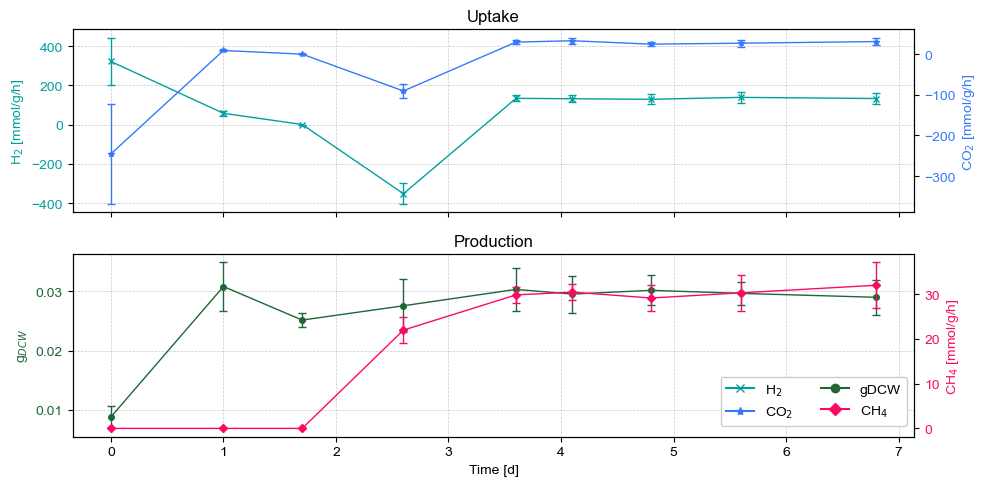

In [27]:
# Create a figure with two subplots (stacked vertically)
fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, sharex=True) #, figsize=(10, 8)

# --------------------- Top subplot: H2 + CO2 ---------------------

# H2 (left y-axis)
ax_top2 = ax_top.twinx()  # right y-axis for CO2

ax_top.errorbar(h2_graph_df['Elasped Days'], h2_graph_df['Average H2 ZZ'],
                yerr=h2_graph_df['STDP H2 ZZ'], color=color_h2, label="H2",
                marker=marker_h2, markersize=4, linewidth=1, linestyle='-', capsize=3)

# CO2 (right y-axis)
ax_top2.errorbar(co2_graph_df['Elasped Days'], co2_graph_df['Average CO2 ZZ'],
                 yerr=co2_graph_df['STDP CO2 ZZ'], color=color_co2, label="CO2",
                 marker=marker_co2, markersize=4, linewidth=1, linestyle='-', capsize=3)

# Axis labels
ax_top.set_ylabel("H$_{2}$ [mmol/g/h]", color=color_h2)
ax_top.tick_params(axis='y', labelcolor=color_h2)

ax_top2.set_ylabel("CO$_{2}$ [mmol/g/h]", color=color_co2)
ax_top2.tick_params(axis='y', labelcolor=color_co2)

# Title and grid
ax_top.set_title("Uptake")
ax_top.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# --------------------- Bottom subplot: gCDW + CH4 ---------------------

# gCDW (left y-axis)
ax_bottom2 = ax_bottom.twinx()  # right y-axis for CH4

ax_bottom.errorbar(gcdw_graph_df[('Reactor', 'Elasped Days')], gcdw_graph_df[('ZZAVG', 'gCDW')],
                   yerr=gcdw_graph_df[('ZZSTD', 'gCDW')], color=color_gcdw, label="gDCW",
                   marker=marker_gcdw, markersize=4, linewidth=1, linestyle='-', capsize=3)

# CH4 (right y-axis)
ax_bottom2.errorbar(ch4_graph_df['Elasped Days'], ch4_graph_df['Average CH4 ZZ'],
                    yerr=ch4_graph_df['STDP CH4 ZZ'], color=color_ch4, label="CH4",
                    marker=marker_ch4, markersize=4, linewidth=1, linestyle='-', capsize=3)

# Axis labels
ax_bottom.set_ylabel("g$_{DCW}$", color=color_gcdw)
ax_bottom.tick_params(axis='y', labelcolor=color_gcdw)

ax_bottom2.set_ylabel("CH$_{4}$ [mmol/g/h]", color=color_ch4)
ax_bottom2.tick_params(axis='y', labelcolor=color_ch4)

# Title and grid
ax_bottom.set_title("Production")
ax_bottom.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# --------------------- Shared X-axis ---------------------
ax_bottom.set_xlabel("Time [d]")

# --------------------- Legend ---------------------
# Create custom legend handles
legend_handles = [
    plt.Line2D([0], [0], color=color_h2, marker=marker_h2, linestyle='-', label="H$_{2}$"),
    plt.Line2D([0], [0], color=color_co2, marker=marker_co2, linestyle='-', label="CO$_{2}$"),
    plt.Line2D([0], [0], color=color_gcdw, marker=marker_gcdw, linestyle='-', label="gDCW"),
    plt.Line2D([0], [0], color=color_ch4, marker=marker_ch4, linestyle='-', label="CH$_{4}$"),
]
fig.legend(handles=legend_handles, loc='lower right', framealpha=1, ncol=2,bbox_to_anchor=(0.92, 0.12))#bbox_to_anchor=(0.5, 1.05),

# Layout
# fig.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for legend
fig.tight_layout()
plt.show()


## EX1) Move the legend to the top graph.

In [28]:
# Write the code for the new graph with the shifted legend here



## 2) Graph strain ZZ data on a 2 graphs (horizontally stacked), with multiple axes (uptake, production)

Uptake = H2/CO2

Production = gDCW/CH4

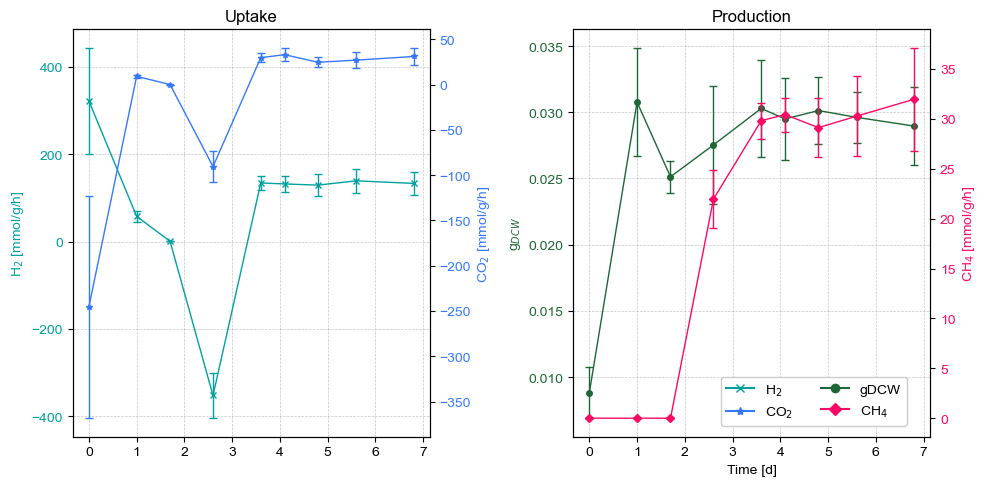

In [29]:
# Create a figure with two subplots (stacked vertically)
fig, (ax_top, ax_bottom) = plt.subplots(nrows=1, ncols=2, sharex=True) #, figsize=(10, 8)

# --------------------- Top subplot: H2 + CO2 ---------------------

# H2 (left y-axis)

ax_top.errorbar(h2_graph_df['Elasped Days'], h2_graph_df['Average H2 ZZ'],
                yerr=h2_graph_df['STDP H2 ZZ'], color=color_h2, label="H2",
                marker=marker_h2, markersize=4, linewidth=1, linestyle='-', capsize=3)

# CO2 (right y-axis)
ax_top2 = ax_top.twinx()  # right y-axis for CO2
ax_top2.errorbar(co2_graph_df['Elasped Days'], co2_graph_df['Average CO2 ZZ'],
                 yerr=co2_graph_df['STDP CO2 ZZ'], color=color_co2, label="CO2",
                 marker=marker_co2, markersize=4, linewidth=1, linestyle='-', capsize=3)

# Axis labels
ax_top.set_ylabel("H$_{2}$ [mmol/g/h]", color=color_h2)
ax_top.tick_params(axis='y', labelcolor=color_h2)

ax_top2.set_ylabel("CO$_{2}$ [mmol/g/h]", color=color_co2)
ax_top2.tick_params(axis='y', labelcolor=color_co2)

# Title and grid
ax_top.set_title("Uptake")
ax_top.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# --------------------- Bottom subplot: gCDW + CH4 ---------------------

# gCDW (left y-axis)
ax_bottom2 = ax_bottom.twinx()  # right y-axis for CH4

ax_bottom.errorbar(gcdw_graph_df[('Reactor', 'Elasped Days')], gcdw_graph_df[('ZZAVG', 'gCDW')],
                   yerr=gcdw_graph_df[('ZZSTD', 'gCDW')], color=color_gcdw, label="gDCW",
                   marker=marker_gcdw, markersize=4, linewidth=1, linestyle='-', capsize=3)

# CH4 (right y-axis)
ax_bottom2.errorbar(ch4_graph_df['Elasped Days'], ch4_graph_df['Average CH4 ZZ'],
                    yerr=ch4_graph_df['STDP CH4 ZZ'], color=color_ch4, label="CH4",
                    marker=marker_ch4, markersize=4, linewidth=1, linestyle='-', capsize=3)

# Axis labels
ax_bottom.set_ylabel("g$_{DCW}$", color=color_gcdw)
ax_bottom.tick_params(axis='y', labelcolor=color_gcdw)

ax_bottom2.set_ylabel("CH$_{4}$ [mmol/g/h]", color=color_ch4)
ax_bottom2.tick_params(axis='y', labelcolor=color_ch4)

# Title and grid
ax_bottom.set_title("Production")
ax_bottom.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# --------------------- Shared X-axis ---------------------
ax_bottom.set_xlabel("Time [d]")

# --------------------- Legend ---------------------
# Create custom legend handles
legend_handles = [
    plt.Line2D([0], [0], color=color_h2, marker=marker_h2, linestyle='-', label="H$_{2}$"),
    plt.Line2D([0], [0], color=color_co2, marker=marker_co2, linestyle='-', label="CO$_{2}$"),
    plt.Line2D([0], [0], color=color_gcdw, marker=marker_gcdw, linestyle='-', label="gDCW"),
    plt.Line2D([0], [0], color=color_ch4, marker=marker_ch4, linestyle='-', label="CH$_{4}$"),
]
fig.legend(handles=legend_handles, loc='lower right', framealpha=1, ncol=2,bbox_to_anchor=(0.92, 0.12))#bbox_to_anchor=(0.5, 1.05),

# Layout
# fig.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for legend
fig.tight_layout()
plt.show()


## EX2) Recreate the plot above but with error bands (instead of error bars)

_Hint: Look back at lesson 004_Plotting2_

In [30]:
# Write the code for the new graph with the error bands here



## 3) Bar graph of max uptake/production rates

Create 4 subplots, one for each of the following: H2, CO2, gDCW, CH4.

Plot the max rate for each of strain

### 3.1) Organize the data

In [31]:
# check your column names, remember gcdw has a different format
print(h2_graph_df.columns)
print("\n",gcdw_graph_df.columns)

Index(['Elasped Days', 'Average H2 DH', 'STDP H2 DH', 'Average H2 ZZ',
       'STDP H2 ZZ', 'Average H2 MM', 'STDP H2 MM'],
      dtype='object')

 MultiIndex([('Reactor', 'Elasped Days'),
            (  'ΔHAVG',         'gCDW'),
            (  'ΔHSTD',         'gCDW'),
            (  'ZZAVG',         'gCDW'),
            (  'ZZSTD',         'gCDW'),
            (  'MMAVG',         'gCDW'),
            (  'MMSTD',         'gCDW')],
           )


In [32]:
x_labels = ["ZZ", "DH", "MM"] # the three different strains
h2_data = [h2_graph_df['Average H2 ZZ'].max(), h2_graph_df['Average H2 DH'].max(), h2_graph_df['Average H2 MM'].max()]
co2_data = [co2_graph_df['Average CO2 ZZ'].max(), co2_graph_df['Average CO2 DH'].max(), co2_graph_df['Average CO2 MM'].max()]
gcdw_data = [gcdw_graph_df[('ZZAVG','gCDW')].max(), gcdw_graph_df[('ΔHAVG','gCDW')].max(), gcdw_graph_df[('MMAVG','gCDW')].max()]
ch4_data = [ch4_graph_df['Average CH4 ZZ'].max(), ch4_graph_df['Average CH4 DH'].max(), ch4_graph_df['Average CH4 MM'].max()]

### 3.2) Colormaps
_New concept: Colormaps, think of them as predefined color palettes._ https://matplotlib.org/stable/gallery/color/colormap_reference.html

In [33]:
# Colors for each strain using a colormap
color_num = 3


# Option 1
# Get the viridis colormap
viridis = plt.colormaps['viridis']  # colormaps are mapped between 0 and 1

# Sample x evenly spaced colors from the colormap
colors = viridis(np.linspace(0, 1, color_num)) # creating a 1D array between 0 and 1 with color_num of points
#--------------------------------------------------------

# # Option 2

# # Create a discrete version of the viridis colormap
# viridis2 = plt.cm.get_cmap('viridis', color_num)  # creates a colormap with `x` discrete colors
# discrete_colors2 = viridis(np.arange(color_num))  # extract the RGBA colors

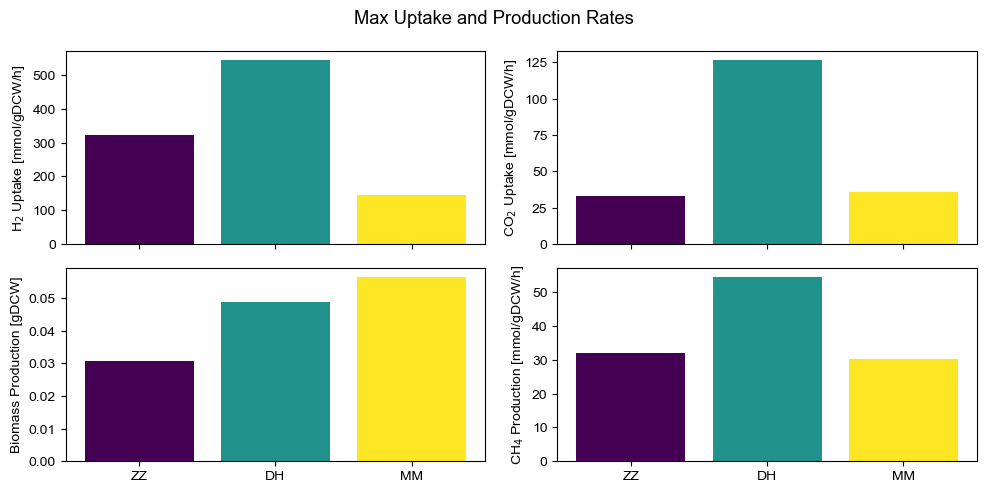

In [34]:
# Create a figure with four subplots
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
(ax11, ax12), (ax21, ax22) = axs

ax11.bar(x_labels, h2_data, color=colors)
ax12.bar(x_labels, co2_data, color=colors)
ax21.bar(x_labels, gcdw_data, color=colors)
ax22.bar(x_labels, ch4_data, color=colors)

# Label Y axis
ax11.set_ylabel('H$_{2}$ Uptake [mmol/gDCW/h]')
ax12.set_ylabel('CO$_{2}$ Uptake [mmol/gDCW/h]')
ax21.set_ylabel('Biomass Production [gDCW]')
ax22.set_ylabel('CH$_{4}$ Production [mmol/gDCW/h]')

# Title for the whole figure
fig.suptitle("Max Uptake and Production Rates")  # Use suptitle for the full figure
plt.tight_layout()
plt.show()


### 3.3) Hatches
_New concept: Hatches (aka the pattern in your bar), you don't always need one but they are helpful for black and white prints and when you need additional distinguishing visuals_ https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html


In [51]:
# Define some hatches
# One for each strain
hatch_styles = ['/', 'x', '||']  # Different hatch styles for each strain
opacity = 0.7  # Set the opacity for the bars

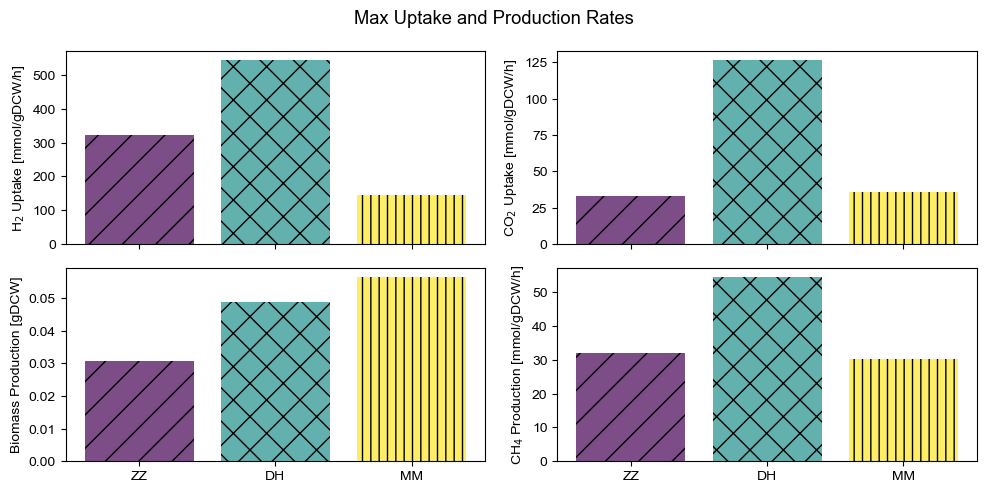

In [52]:
# Create a figure with four subplots
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
(ax11, ax12), (ax21, ax22) = axs

ax11.bar(x_labels, h2_data, color=colors, alpha = opacity, hatch=hatch_styles)
ax12.bar(x_labels, co2_data, color=colors,alpha = opacity, hatch=hatch_styles)
ax21.bar(x_labels, gcdw_data, color=colors,alpha = opacity, hatch=hatch_styles)
ax22.bar(x_labels, ch4_data, color=colors,alpha = opacity, hatch=hatch_styles)

# Label Y axis
ax11.set_ylabel('H$_{2}$ Uptake [mmol/gDCW/h]')
ax12.set_ylabel('CO$_{2}$ Uptake [mmol/gDCW/h]')
ax21.set_ylabel('Biomass Production [gDCW]')
ax22.set_ylabel('CH$_{4}$ Production [mmol/gDCW/h]')

# Title for the whole figure
fig.suptitle("Max Uptake and Production Rates")  # Use suptitle for the full figure
plt.tight_layout()
plt.show()
